In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"D:\Users\~sUMIt~\Downloads\loan_prediction.csv")

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 null values are present in given dataset

In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')

In [10]:
   for i in df.columns:
        df[i]=imp.fit_transform(df[i].values.reshape(-1,1))      

In [11]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


in above simpleimputer class is used to remove null values from dataset

In [41]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there is no Null values are present in Dataset

# Apply lambda function for convert df['Loan_Status'] column from object to int

In [12]:
df['Loan_Status']=df['Loan_Status'].apply(lambda x:1 if 'Y' in x else 0)

In [13]:
df["Loan_Status"]=df["Loan_Status"].astype(int)

In [53]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Total candidates who are applying for Loan are 614 but only 422 is getting Loan

In [27]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# EDA Analysis(Data visulization)

# Loan_status analysis by gender

<AxesSubplot:xlabel='Gender', ylabel='Count'>

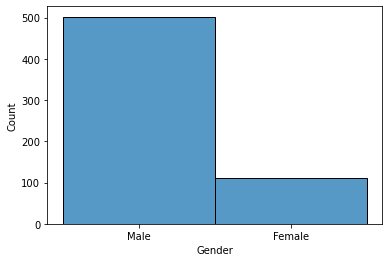

In [16]:
sns.histplot(df['Gender'])

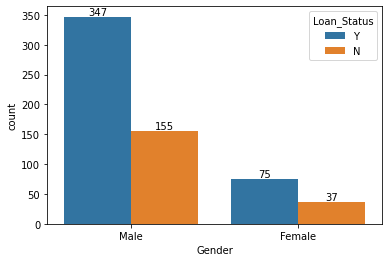

In [25]:
ax=sns.countplot(hue=df.Loan_Status,x=df['Gender'])
for i in ax.containers:
    ax.bar_label(i)

In [63]:
df.groupby(['Gender'],as_index=False)['Loan_Status'].sum().sort_values(by='Loan_Status',ascending=False)



,Gender,Loan_Status
1,Male,347
0,Female,75


1-above graph represents 347 Male candiates and 75 Female candidiates are getting Loan.
2-155 male aplicant applications are rejected while 37 Female aplicant applications are rejected


# Loan_status by Married

<AxesSubplot:xlabel='Married', ylabel='Count'>

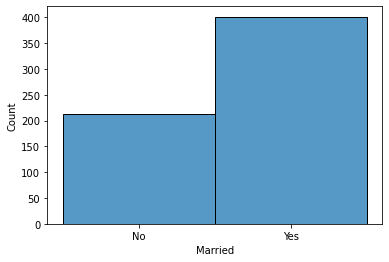

In [17]:
sns.histplot(df['Married'])

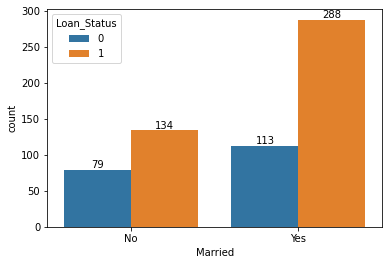

In [64]:
ax=sns.countplot(hue=df.Loan_Status,x=df['Married'])
for i in ax.containers:
    ax.bar_label(i)

In [65]:
df.groupby(['Married'],as_index=False)['Loan_Status'].sum().sort_values(by='Loan_Status',ascending=False)

,Married,Loan_Status
1,Yes,288
0,No,134


1-As per above graph it seems 288 married applicants while 134 unmarried applicants are getting Loan.
2-113 married applicants appliction  and 79 unmarried applicants application have rejcted

# Loan_status by Education

<AxesSubplot:xlabel='Education', ylabel='Count'>

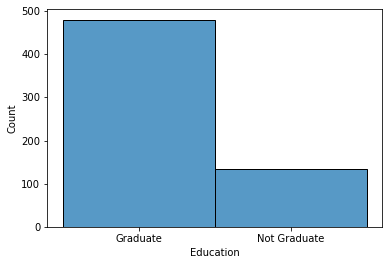

In [18]:
sns.histplot(df['Education'])

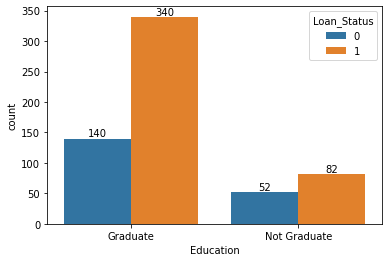

In [66]:
ax=sns.countplot(hue=df.Loan_Status,x=df['Education'])
for i in ax.containers:
    ax.bar_label(i)

In [67]:
df.groupby(['Education'],as_index=False)['Loan_Status'].sum().sort_values(by='Loan_Status',ascending=False)

,Education,Loan_Status
0,Graduate,340
1,Not Graduate,82


1-graduate peroples are more intrested in Loan .
2-340 no of graduate applicants while 82 no of  ungraduate applicants are getting Loan.

# Loan_status by Property_Area

<AxesSubplot:xlabel='Property_Area', ylabel='Count'>

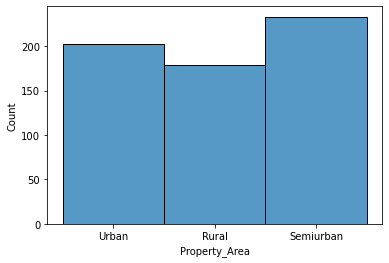

In [19]:
sns.histplot(df['Property_Area'])

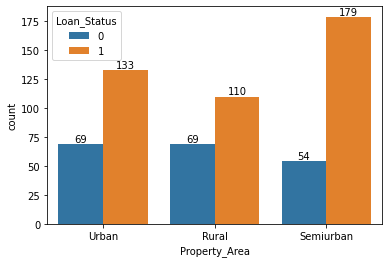

In [68]:
ax=sns.countplot(hue=df.Loan_Status,x=df['Property_Area'])
for i in ax.containers:
    ax.bar_label(i)

In [69]:
df.groupby(['Property_Area'],as_index=False)['Loan_Status'].sum().sort_values(by='Loan_Status',ascending=False)

,Property_Area,Loan_Status
1,Semiurban,179
2,Urban,133
0,Rural,110


loan is highly dependant on area .It means Applictions for loan are being sortlisted by Property_Area
here is the sequence:....
semiurban>urban>rural_area

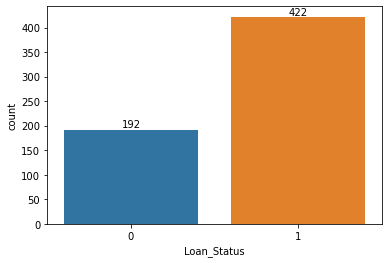

In [70]:
ax=sns.countplot(df['Loan_Status'])
for i in ax.containers:
    ax.bar_label(i)

here we 422 peoples are getting loans & 192 are not getting

# Loan_status by ApplicantIncome

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

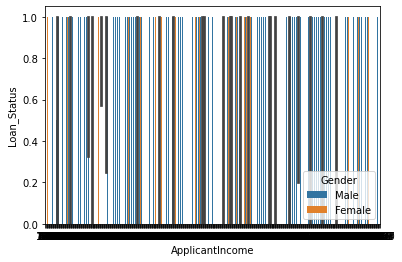

In [78]:
a=df.groupby(['ApplicantIncome'],as_index=False)['Loan_Status'].sum().sort_values(by='Loan_Status',ascending=False)
sns.barplot(x=df['ApplicantIncome'],y=df['Loan_Status'],data=a,hue=df['Gender'])

In [79]:
df.groupby(['ApplicantIncome'],as_index=False)['Loan_Status'].sum().sort_values(by='Loan_Status',ascending=False)

,ApplicantIncome,Loan_Status
84,2500,8
186,3333,5
392,6250,4
90,2583,4
434,8333,4
...,...,...
266,3992,0
271,4050,0
272,4053,0
284,4200,0


Above Analysis represents that ApplicantIncome is not more dependant with Loan_status

# Loan_Status Analysis by Credit_History of  Aplicant

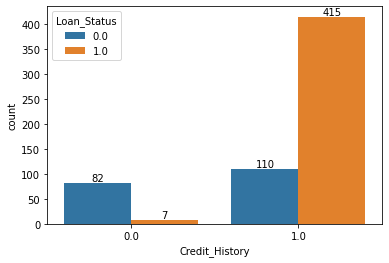

In [153]:
ax=sns.countplot(hue=df.Loan_Status,x=df['Credit_History'])
for i in ax.containers:
    ax.bar_label(i)

In [154]:
df.groupby(['Credit_History'],as_index=False)['Loan_Status'].sum().sort_values(by='Loan_Status',ascending=False)

,Credit_History,Loan_Status
1,1.0,415.0
0,0.0,7.0


Above Analysis represents that whose credit History record is excellent only those applicant are being considered for Loan saction and only very few applicant who are still getting considered for loan in spite of bad credit history records.
1-Total no of Applicant who have good credit history records are=525 but no of applicant who are considered for Loan are 415. 
2-Total no of Applicant who have bad credit history records are=89 but no of applicant who are considered for Loan are only 7. 

# Preprocess steps for given Raw data

convert the object data into int data by using  OrdinalEncoder

In [96]:
from sklearn.preprocessing import OrdinalEncoder
en=OrdinalEncoder()

In [97]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))

In [98]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


here we have used OrdinalEncoder to convert the object value into int value,now dataframe consists only int value.

# Defining Correlation for given Datasets

In [64]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.037369,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549


In [65]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.031808
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

here we have defined the corr of O/P Column with other columns of given dataset

# Ploting HeatMap

<AxesSubplot:>

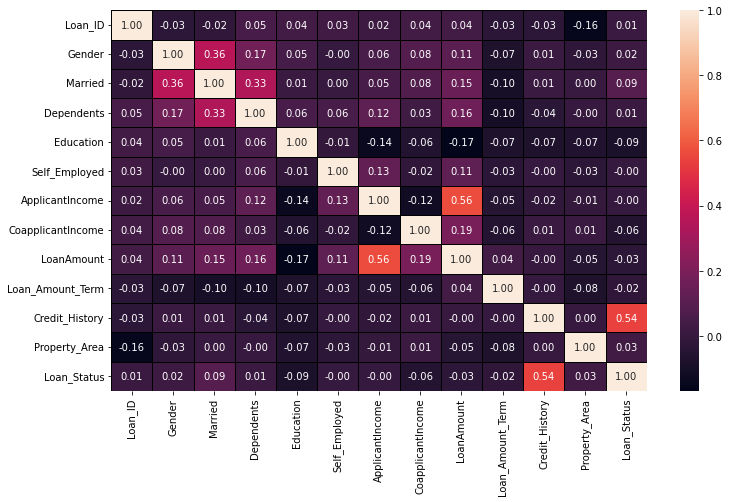

In [66]:
plt.figure(figsize=(12,7))

sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='Black',fmt='.2f')

This is the graphical representation of Output column with other columns of dataset

# Describing the Given Dataset

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.465798,84.180967,9.0,100.25,125.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.00,1.0,1.00,1.0


<AxesSubplot:>

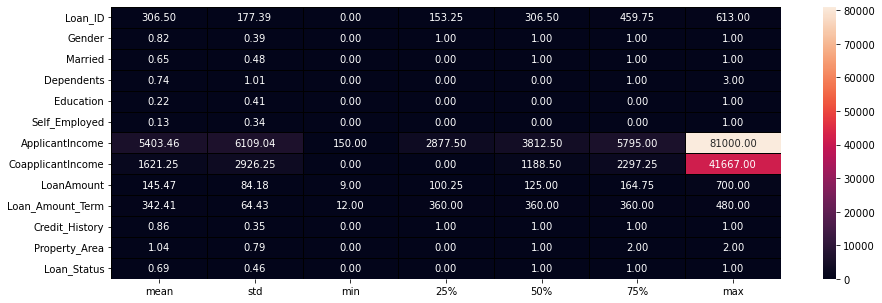

In [68]:
plt.figure(figsize=(15,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=.5,linecolor='Black',fmt='.2f')

While Describing the given Dataset there are some useful insights are as below... 1-Aplicant Min Income is 150USD,Avg income 5403USD,Max Income 81000USD/per Month. 2-Min Loan Amount that is demanded by applicant is 9USD,Avg Amount 145USD and max 700USD.

# Defining Skewness in Dataset

In [99]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

skewness are present in Dataset

# finding outliers present in given dataset

Loan_ID                 AxesSubplot(0.125,0.657941;0.110714x0.222059)
Gender               AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Married              AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Dependents           AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Education            AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Self_Employed        AxesSubplot(0.789286,0.657941;0.110714x0.222059)
ApplicantIncome         AxesSubplot(0.125,0.391471;0.110714x0.222059)
CoapplicantIncome    AxesSubplot(0.257857,0.391471;0.110714x0.222059)
LoanAmount           AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Loan_Amount_Term     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Credit_History       AxesSubplot(0.656429,0.391471;0.110714x0.222059)
Property_Area        AxesSubplot(0.789286,0.391471;0.110714x0.222059)
Loan_Status                AxesSubplot(0.125,0.125;0.110714x0.222059)
dtype: object

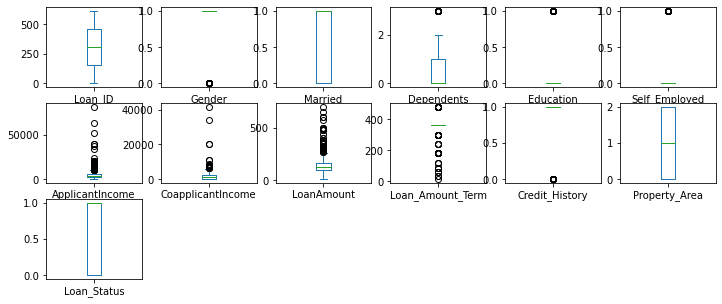

In [100]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(12,5))

outliers are presendt in given datasets

# we are using zscore method to determine & for removing these outliers

In [101]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [72]:
z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.729232,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.302759,0.273231,0.411733,1.223298,0.674519
1,1.723590,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.207648,0.273231,0.411733,1.318513,1.482537
2,1.717948,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.944757,0.273231,0.411733,1.223298,0.674519
3,1.712307,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.302759,0.273231,0.411733,1.223298,0.674519
4,1.706665,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.053093,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.885313,0.273231,0.411733,1.318513,0.674519
610,1.712307,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.253868,2.522836,0.411733,1.318513,0.674519
611,1.717948,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.278459,0.273231,0.411733,1.223298,0.674519
612,1.723590,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.493794,0.273231,0.411733,1.223298,0.674519


In [102]:
thresold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
       8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
      dtype=int64))


In [103]:
df_new=df[(z<3).all(axis=1)]

In [104]:
print('Old_dataframe',df.shape)
print('new_dataframe',df_new.shape)
print("reduction in rows",df.shape[0]-df_new.shape[0])

Old_dataframe (614, 13)
new_dataframe (577, 13)
reduction in rows 37


In [105]:
Percentage_dataloss=(614-577)/614*100

In [106]:
Percentage_dataloss

6.026058631921824

# Spliting I/P and O/P Data

In [107]:
x=df_new.drop('Loan_Status',axis=1)

In [108]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0


In [109]:
x.shape

(577, 12)

In [110]:
y=df_new['Loan_Status']

In [111]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 577, dtype: float64

In [112]:
y.shape

(577,)

# Transformimg Data to remove skewness

Using the power transforming method to remove Skewness present in the given dataset

In [113]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [114]:
x

array([[-2.15916611,  0.47713685, -1.36251079, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.13342327,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254, -1.34019905],
       [-2.11139231,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 1.55825237,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56257804,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56690162, -2.09583477, -1.36251079, ...,  0.13078824,
        -2.38941464,  0.01546372]])

the MIN values & MAX values difference is higher in Describe dataset so use the scaling method to scale the data

In [115]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [116]:
x=sc.fit_transform(x)

In [117]:
x

array([[-2.15916611,  0.47713685, -1.36251079, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.13342327,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254, -1.34019905],
       [-2.11139231,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 1.55825237,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56257804,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56690162, -2.09583477, -1.36251079, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
lg=LogisticRegression()

In [93]:
for i in range(0,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
        lg.fit(train_x,train_y)
        lrpred=lg.predict(test_x)
        print(f"at random_state{i},the testing accuracy score is := {accuracy_score(test_y,lrpred)}")
        print(f"at random_state{i},the training accuracy is: =   {lg.score(train_x,train_y)}")

at random_state0,the testing accuracy score is := 0.7931034482758621
at random_state0,the training accuracy is: =   0.824295010845987
at random_state1,the testing accuracy score is := 0.8275862068965517
at random_state1,the training accuracy is: =   0.8156182212581344
at random_state2,the testing accuracy score is := 0.8103448275862069
at random_state2,the training accuracy is: =   0.8199566160520607
at random_state3,the testing accuracy score is := 0.7931034482758621
at random_state3,the training accuracy is: =   0.824295010845987
at random_state4,the testing accuracy score is := 0.8017241379310345
at random_state4,the training accuracy is: =   0.824295010845987
at random_state5,the testing accuracy score is := 0.7931034482758621
at random_state5,the training accuracy is: =   0.824295010845987
at random_state6,the testing accuracy score is := 0.8620689655172413
at random_state6,the training accuracy is: =   0.806941431670282
at random_state7,the testing accuracy score is := 0.80172413

In [121]:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=44)
        lg.fit(train_x,train_y)
        lrpred=lg.predict(test_x)
        print(f"at random_state{44},the testing accuracy score is := {accuracy_score(test_y,lrpred)}")
        print(f"at random_state{44},the training accuracy is: =   {lg.score(train_x,train_y)}")

at random_state44,the testing accuracy score is := 0.8103448275862069
at random_state44,the training accuracy is: =   0.8199566160520607


# AUC & ROC Curve

In [98]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [99]:
y_pred_prob=lg.predict_proba(test_x)[:,1]

In [100]:
y_pred_prob

array([0.87066615, 0.86697548, 0.75286531, 0.80032017, 0.84738563,
       0.84599505, 0.73588259, 0.86881765, 0.83884192, 0.03366383,
       0.78255693, 0.83894934, 0.76073976, 0.72245036, 0.90340238,
       0.91343372, 0.73092376, 0.10077175, 0.88189521, 0.82480128,
       0.03108705, 0.67119192, 0.82847435, 0.12217519, 0.83930784,
       0.9050935 , 0.80924866, 0.79272799, 0.78995733, 0.80946243,
       0.71840781, 0.74977277, 0.13710835, 0.78555265, 0.69529428,
       0.83541803, 0.83541206, 0.87539702, 0.83900175, 0.8754683 ,
       0.88203095, 0.90725201, 0.89930907, 0.81397298, 0.80556143,
       0.70110214, 0.80701985, 0.86061357, 0.86129765, 0.80257164,
       0.7007524 , 0.85105905, 0.81586116, 0.91721942, 0.77895236,
       0.08358305, 0.04444646, 0.82509252, 0.80429395, 0.86863181,
       0.84488484, 0.78087975, 0.72270884, 0.64436192, 0.83193364,
       0.86126105, 0.76581766, 0.93524948, 0.76876559, 0.86953796,
       0.75364711, 0.76547718, 0.15403534, 0.06541648, 0.80834

In [101]:
fpr,tpr,thresold=roc_curve(test_y,y_pred_prob)

In [102]:
fpr

array([0.        , 0.        , 0.        , 0.03225806, 0.03225806,
       0.06451613, 0.06451613, 0.09677419, 0.09677419, 0.12903226,
       0.12903226, 0.16129032, 0.16129032, 0.22580645, 0.22580645,
       0.25806452, 0.25806452, 0.29032258, 0.29032258, 0.32258065,
       0.32258065, 0.35483871, 0.35483871, 0.41935484, 0.41935484,
       0.4516129 , 0.4516129 , 0.5483871 , 0.5483871 , 0.58064516,
       0.58064516, 0.61290323, 0.61290323, 0.64516129, 0.64516129,
       0.74193548, 0.74193548, 1.        ])

In [103]:
tpr

array([0.        , 0.01176471, 0.10588235, 0.10588235, 0.11764706,
       0.11764706, 0.27058824, 0.27058824, 0.4       , 0.4       ,
       0.52941176, 0.52941176, 0.61176471, 0.61176471, 0.68235294,
       0.68235294, 0.69411765, 0.69411765, 0.71764706, 0.71764706,
       0.74117647, 0.74117647, 0.78823529, 0.78823529, 0.83529412,
       0.83529412, 0.84705882, 0.84705882, 0.90588235, 0.90588235,
       0.92941176, 0.92941176, 0.94117647, 0.94117647, 0.98823529,
       0.98823529, 1.        , 1.        ])

In [104]:
thresold

array([1.93524948, 0.93524948, 0.89704618, 0.88315692, 0.88221308,
       0.88203095, 0.86061357, 0.85985396, 0.83930784, 0.83900175,
       0.82480128, 0.81586116, 0.80556143, 0.80429395, 0.78758334,
       0.78656888, 0.78555265, 0.78255693, 0.77907456, 0.77895236,
       0.77094717, 0.7698593 , 0.76547718, 0.75364711, 0.74977277,
       0.74100462, 0.73588259, 0.72513363, 0.70110214, 0.7007524 ,
       0.68771102, 0.68619944, 0.68174621, 0.67914253, 0.62975048,
       0.14881702, 0.13710835, 0.03108705])

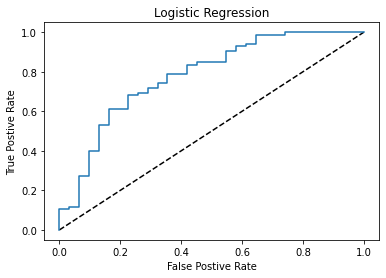

In [106]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("Logistic Regression")
plt.show()

In [107]:
roc_score=roc_auc_score(test_y,y_pred_prob)
roc_score

0.7798861480075902

Hence the roc_auc score for Logistic Regression Model is 77.9%

# Using crossvalidation Model

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
cv_score=cross_val_score(lg,x,y,cv=2)
mean_accuracy=cv_score.mean()

In [110]:
cv_score=cross_val_score(lg,x,y,cv=3)
mean_accuracy=cv_score.mean()
mean_accuracy

0.8180411629245826

In [111]:
cv_score=cross_val_score(lg,x,y,cv=4)
mean_accuracy=cv_score.mean()
mean_accuracy

0.8197557471264367

In [112]:
cv_score=cross_val_score(lg,x,y,cv=5)
mean_accuracy=cv_score.mean()
mean_accuracy

0.8180809595202397

mean_accuracy for LogisticRegression is 81.8%

# Classifiers

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [115]:
knn=KNeighborsClassifier(n_neighbors=5)

In [116]:
for i in range(2,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.22,random_state=i)
        knn.fit(train_x,train_y)
        predknn=knn.predict(test_x)
        print(f"at random_state{i},the testing accuracy score is := {accuracy_score(test_y,predknn)}")
        print(f"at random_state{i},the training accuracy is: =      {knn.score(train_x,train_y)}")
        print(f"at random_state{i},the confusion_matrix is:=        {confusion_matrix(test_y,predknn)}")
        print(f"at random_state{i},the classification_report is:=   {classification_report(test_y,predknn)}")
        print("\n")

at random_state2,the testing accuracy score is := 0.7874015748031497
at random_state2,the training accuracy is: =      0.8222222222222222
at random_state2,the confusion_matrix is:=        [[21 23]
 [ 4 79]]
at random_state2,the classification_report is:=                 precision    recall  f1-score   support

         0.0       0.84      0.48      0.61        44
         1.0       0.77      0.95      0.85        83

    accuracy                           0.79       127
   macro avg       0.81      0.71      0.73       127
weighted avg       0.80      0.79      0.77       127



at random_state3,the testing accuracy score is := 0.8031496062992126
at random_state3,the training accuracy is: =      0.8355555555555556
at random_state3,the confusion_matrix is:=        [[15 22]
 [ 3 87]]
at random_state3,the classification_report is:=                 precision    recall  f1-score   support

         0.0       0.83      0.41      0.55        37
         1.0       0.80      0.97      0.87     

at random_state33,the testing accuracy score is := 0.8346456692913385
at random_state33,the training accuracy is: =      0.8444444444444444
at random_state33,the confusion_matrix is:=        [[15 18]

In [140]:
cv_score=cross_val_score(knn,x,y,cv=6)
mean_score=cv_score.mean()
mean_score

0.8006693871706759

knn cross validation score is=80%

In [119]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [120]:
for i in range(2,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.22,random_state=i)
        gnb.fit(train_x,train_y)
        predgnb=gnb.predict(test_x)
        print(f"at random_state{i},the testing accuracy score is := {accuracy_score(test_y,predgnb)}")
        print(f"at random_state{i},the training accuracy is: =      {knn.score(train_x,train_y)}")
        print(f"at random_state{i},the confusion_matrix is:=        {confusion_matrix(test_y,predgnb)}")
        print(f"at random_state{i},the classification_report is:=   {classification_report(test_y,predgnb)}")
        print("\n")

at random_state2,the testing accuracy score is := 0.7874015748031497
at random_state2,the training accuracy is: =      0.8311111111111111
at random_state2,the confusion_matrix is:=        [[20 24]
 [ 3 80]]
at random_state2,the classification_report is:=                 precision    recall  f1-score   support

         0.0       0.87      0.45      0.60        44
         1.0       0.77      0.96      0.86        83

    accuracy                           0.79       127
   macro avg       0.82      0.71      0.73       127
weighted avg       0.80      0.79      0.77       127



at random_state3,the testing accuracy score is := 0.8031496062992126
at random_state3,the training accuracy is: =      0.8244444444444444
at random_state3,the confusion_matrix is:=        [[15 22]
 [ 3 87]]
at random_state3,the classification_report is:=                 precision    recall  f1-score   support

         0.0       0.83      0.41      0.55        37
         1.0       0.80      0.97      0.87     

here the accuracy are defined at diff Random_state but not better than KNN model till now

# Use GRIDSEARCHCV

In [121]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

In [122]:
grid_param={'criterion':['ginni','entropy']}
grid=GridSearchCV(dtc,grid_param)
grid.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['ginni', 'entropy']})

In [123]:
print(grid.best_params_)

{'criterion': 'entropy'}


In [124]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x,train_y)
dtcpred=dtc.predict(test_x)
print(f"dtc training score is:= {dtc.score(train_x,train_y)}")
print(f"dtc testing score is:= {accuracy_score(test_y,dtcpred)}")
print(f"confusion matrix is:={confusion_matrix(test_y,dtcpred)}")
print(f"classification report is:={classification_report(test_y,dtcpred)}")

dtc training score is:= 1.0
dtc testing score is:= 0.7086614173228346
confusion matrix is:=[[20 18]
 [19 70]]
classification report is:=              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52        38
         1.0       0.80      0.79      0.79        89

    accuracy                           0.71       127
   macro avg       0.65      0.66      0.66       127
weighted avg       0.71      0.71      0.71       127



# SVC classifier

In [125]:
svc=SVC()

In [126]:
grid_param={'kernel':['rbf','poly','linear']}
grid=GridSearchCV(svc,grid_param)
grid.fit(train_x,train_y)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'poly', 'linear']})

In [127]:
print(grid.best_params_)

{'kernel': 'rbf'}


In [128]:
svc=SVC()
svc.fit(train_x,train_y)
svcpred=svc.predict(test_x)
print(f"svc training score is:= {svc.score(train_x,train_y)}")
print(f"svc testing score is:= {accuracy_score(test_y,svcpred)}")
print(f"confusion matrix is:={confusion_matrix(test_y,svcpred)}")
print(f"classification report is:={classification_report(test_y,svcpred)}")

svc training score is:= 0.8377777777777777
svc testing score is:= 0.7795275590551181
confusion matrix is:=[[15 23]
 [ 5 84]]
classification report is:=              precision    recall  f1-score   support

         0.0       0.75      0.39      0.52        38
         1.0       0.79      0.94      0.86        89

    accuracy                           0.78       127
   macro avg       0.77      0.67      0.69       127
weighted avg       0.77      0.78      0.76       127



# RandomForestClassifier Model

In [150]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [148]:
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
rf_pred=rf.predict(test_x)
print(f"dtc training score is:= {rf.score(train_x,train_y)}")
print(f"dtc testing score is:= {accuracy_score(test_y,rf_pred)}")
print(f"confusion matrix is:={confusion_matrix(test_y,rf_pred)}")
print(f"classification report is:={classification_report(test_y,rf_pred)}")


dtc training score is:= 1.0
dtc testing score is:= 0.7844827586206896
confusion matrix is:=[[12 19]
 [ 6 79]]
classification report is:=              precision    recall  f1-score   support

         0.0       0.67      0.39      0.49        31
         1.0       0.81      0.93      0.86        85

    accuracy                           0.78       116
   macro avg       0.74      0.66      0.68       116
weighted avg       0.77      0.78      0.76       116



testing accuracy for given RandomForestClassifier does not match with our expectations

# AdaBoostClassifier Model

In [151]:
ad=AdaBoostClassifier()
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)
print(f"dtc training score is:= {ad.score(train_x,train_y)}")
print(f"dtc testing score is:= {accuracy_score(test_y,ad_pred)}")
print(f"confusion matrix is:={confusion_matrix(test_y,ad_pred)}")
print(f"classification report is:={classification_report(test_y,ad_pred)}")

dtc training score is:= 0.8503253796095445
dtc testing score is:= 0.7413793103448276
confusion matrix is:=[[11 20]
 [10 75]]
classification report is:=              precision    recall  f1-score   support

         0.0       0.52      0.35      0.42        31
         1.0       0.79      0.88      0.83        85

    accuracy                           0.74       116
   macro avg       0.66      0.62      0.63       116
weighted avg       0.72      0.74      0.72       116



testing accuracy for given AdaBoostClassifier does not match with our expectations

# Predicting the best performance model

Hence we found knn classifier model is the best performance model 
training accuracy=84.4%
testing accuracy=83.4%
Roc_score=77.9%

# Save the model for Production purpose

In [141]:
import joblib
LoanStatus_file=joblib.dump(knn,"Loanfile.obj")
LoanStatus_file

['Loanfile.obj']